# 모델 학습 데이터 준비

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# 데이터 불러오기
data = pd.read_csv('./model_data.csv')
data.head()

,bus_no,now_stop_name,now_stop_lat,now_stop_long,next_stop_name,next_stop_lat,next_stop_long,distance,time,day,weather_0,weather_11,weather_21,weather_22,weather_23,year,month,il
0,1,19,36.358602,127.412893,22,36.358013,127.395171,2.2,7,3,True,False,False,False,False,2024,1,2
1,1,25,36.358013,127.395171,23,36.357934,127.381689,1.2,4,3,True,False,False,False,False,2024,1,2
2,1,26,36.357934,127.381689,4,36.357907,127.372136,0.9,5,3,True,False,False,False,False,2024,1,2
3,1,4,36.357907,127.372136,18,36.358705,127.362427,0.9,5,3,True,False,False,False,False,2024,1,2
4,1,22,36.358705,127.362427,0,36.361253,127.344114,1.8,6,3,True,False,False,False,False,2024,1,2


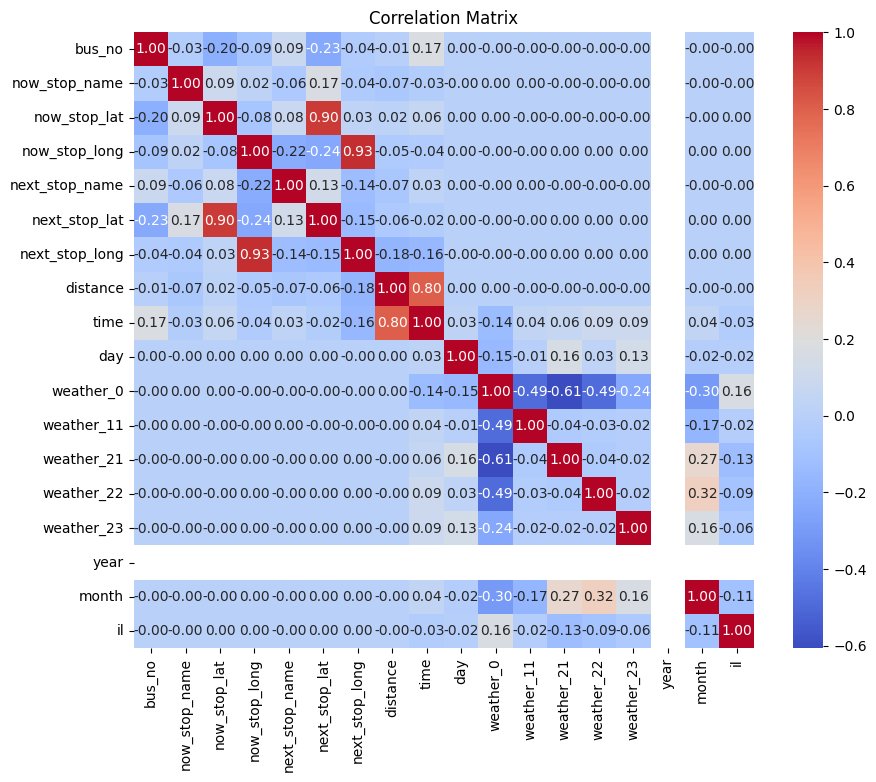

In [14]:
# 상관관계 찾기
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# 모델에 학습 시킬 데이터 선택
selected_features = ['distance', 'day', 'now_stop_lat', 'now_stop_long', 'next_stop_lat', 'next_stop_long', 
                     'weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no']

# 타겟 변수 설정
X_selected = data[selected_features]
y = data['time']

# 학습데이터, test 나누기
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 모델 학습

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [23]:
# 모델 학습
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return mae, rmse

# 각 모델 준비
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'Elastic Net': ElasticNet(random_state=42)
}


results = {}
for name, model in models.items():
    mae, rmse = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'RMSE': rmse}

results

/home/j-i11b109/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/j-i11b109/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/j-i11b109/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 3236, number of used features: 12
[LightGBM] [Info] Start training from score 6.508962


/home/j-i11b109/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/j-i11b109/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/j-i11b109/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/j-i11b109/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t

,MAE,RMSE
Linear Regression,1.469450,1.877559
Random Forest,0.378462,0.638198
XGBoost,0.386820,0.708286
LightGBM,0.379852,0.644242
CatBoost,0.377075,0.669581
SVR,2.405166,3.189594
KNN,0.480247,0.915464
Lasso,1.584164,2.100758
Ridge,1.489415,1.916783
Elastic Net,1.619089,2.091432


In [28]:
results_df = pd.DataFrame(results).T
results_df

,MAE,RMSE
Linear Regression,1.469450,1.877559
Random Forest,0.378462,0.638198
XGBoost,0.386820,0.708286
LightGBM,0.379852,0.644242
CatBoost,0.377075,0.669581
SVR,2.405166,3.189594
KNN,0.480247,0.915464
Lasso,1.584164,2.100758
Ridge,1.489415,1.916783
Elastic Net,1.619089,2.091432


In [31]:
# 랜덤 포레스트 모델 학습

# 모델에 학습 시킬 데이터 선택
selected_features = ['distance', 'day', 'now_stop_lat', 'now_stop_long', 'next_stop_lat', 'next_stop_long', 
                     'weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no']

# 타겟 변수 설정
X_selected = data[selected_features]
y = data['time']

# 범주형 변수를 더미 변수로 변환
X_selected = pd.get_dummies(X_selected, columns=['weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no'])

# 학습데이터, test 나누기
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Random Forest 모델 초기화 및 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측 수행
y_pred = rf_model.predict(X_test)

# RMSE 계산 함수 RMSE 함수 쓰니까 에러 뜸
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 0.378604346069475
RMSE: 0.6385865720480973


In [36]:
# 하이퍼 파라미터 튜닝

# 모델에 학습 시킬 데이터 선택
selected_features = ['distance', 'day', 'now_stop_lat', 'now_stop_long', 'next_stop_lat', 'next_stop_long', 
                     'weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no']

# 타겟 변수 설정
X_selected = data[selected_features]
y = data['time']


# 범주형 변수를 더미 변수로 변환
X_selected = pd.get_dummies(X_selected, columns=['weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no'])

# 학습데이터, test 나누기
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV 초기화 및 학습
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적 모델로 예측 수행
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# RMSE 계산을 위한 사용자 정의 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
MAE: 0.3711690535709654
RMSE: 0.6280349505935185


In [38]:
# 하이퍼 파라미터 값 으로 모델 훈련

# 모델에 학습 시킬 데이터 선택
selected_features = ['distance', 'day', 'now_stop_lat', 'now_stop_long', 'next_stop_lat', 'next_stop_long', 
                     'weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no']

# 타겟 변수 설정
X_selected = data[selected_features]
y = data['time']


# 범주형 변수를 더미 변수로 변환
X_selected = pd.get_dummies(X_selected, columns=['weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no'])

# 학습데이터, test 나누기
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 최적 하이퍼파라미터로 Random Forest 모델 초기화
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

rf_model = RandomForestRegressor(**best_params, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측 수행
y_pred = rf_model.predict(X_test)

# RMSE 계산을 위한 사용자 정의 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 0.3711690535709654
RMSE: 0.6280349505935185
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.7s
[CV] E

In [39]:
import joblib

# 최적 모델 저장
joblib.dump(rf_model, 'time_estimate_model.pkl')

# 모델 불러오기
# model = joblib.load('time_estimate_model.pkl')


['time_estimate_model.pkl']

In [77]:
import joblib
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# 모델 불러오기
best_rf_model_loaded = joblib.load('time_estimate_model.pkl')

# 정류장 데이터 불러오기
stops_file_path = './final_data.csv'
stops_df = pd.read_csv(stops_file_path, encoding='cp949')

# 위도와 경도를 이용하여 가장 가까운 정류장 찾기 함수
def find_nearest_stop(lat, long, stops_df):
    min_distance = float('inf')
    nearest_stop = None
    for index, row in stops_df.iterrows():
        stop_location = (row['now_stop_lat'], row['now_stop_long'])
        distance = geodesic((lat, long), stop_location).meters
        if distance < min_distance:
            min_distance = distance
            nearest_stop = row['now_stop_name']
    return nearest_stop

# 새로운 데이터 포인트 준비
new_data = {
    'distance': [1],
    'day': [3],
    'now_stop_lat': [36.358013],
    'now_stop_long': [127.395171],
    'next_stop_lat': [36.357907],
    'next_stop_long': [127.372136],
    'weather_0': [1],
    'weather_11': [0],
    'weather_21': [0],
    'weather_22': [0],
    'weather_23': [0],
    'bus_no': [1]
}

# DataFrame으로 변환
new_data_df = pd.DataFrame(new_data)

# 현재 위치와 다음 정류장 정보 찾기
# current_stop_name = find_nearest_stop(new_data['now_stop_lat'][0], new_data['now_stop_long'][0], stops_df)
next_stop_name = find_nearest_stop(new_data['next_stop_lat'][0], new_data['next_stop_long'][0], stops_df)

# 필요 없는 이름 열을 제거하고 나머지 변수를 모델에 맞게 변환
new_data_df = new_data_df.drop(columns=['now_stop_lat', 'now_stop_long', 'next_stop_lat', 'next_stop_long'])

# 범주형 변수를 더미 변수로 변환 (학습 데이터와 동일한 전처리)
new_data_df = pd.get_dummies(new_data_df, columns=['weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no'])

# 학습 시 사용된 모든 열을 맞추기 위해 누락된 열을 추가
missing_cols = set(X_selected.columns) - set(new_data_df.columns)
for col in missing_cols:
    new_data_df[col] = 0
new_data_df = new_data_df[X_selected.columns]  # 열 순서를 학습 데이터와 동일하게 맞춤

# 예측 수행
predicted_time = best_rf_model_loaded.predict(new_data_df)

# print(f'현재 위치: {current_stop_name}')
print(f'다음 정류장: {next_stop_name}')
print(f'예상 도착 시간: {predicted_time[0]:.0f} 분')


다음 정류장: 갈마역
예상 도착 시간: 10 분


In [80]:
# 모델 r2 스코어 확인
from sklearn.metrics import r2_score
import joblib
import pandas as pd

# 모델 불러오기
model = joblib.load('time_estimate_model.pkl')

# 데이터 로드 및 전처리 (기존 방식)
data = pd.read_csv('./model_data.csv')  # 파일 경로에 따라 수정 필요
selected_features = ['distance', 'day', 'now_stop_lat', 'now_stop_long', 'next_stop_lat', 'next_stop_long', 
                     'weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no']
X_selected = data[selected_features]
y = data['time']
X_selected = pd.get_dummies(X_selected, columns=['weather_0', 'weather_11', 'weather_21', 'weather_22', 'weather_23', 'bus_no'])
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# R² 스코어 계산
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')

R² Score: 0.97
